In [11]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

from skimage.measure import label, regionprops
from skimage.morphology import dilation, square

import json

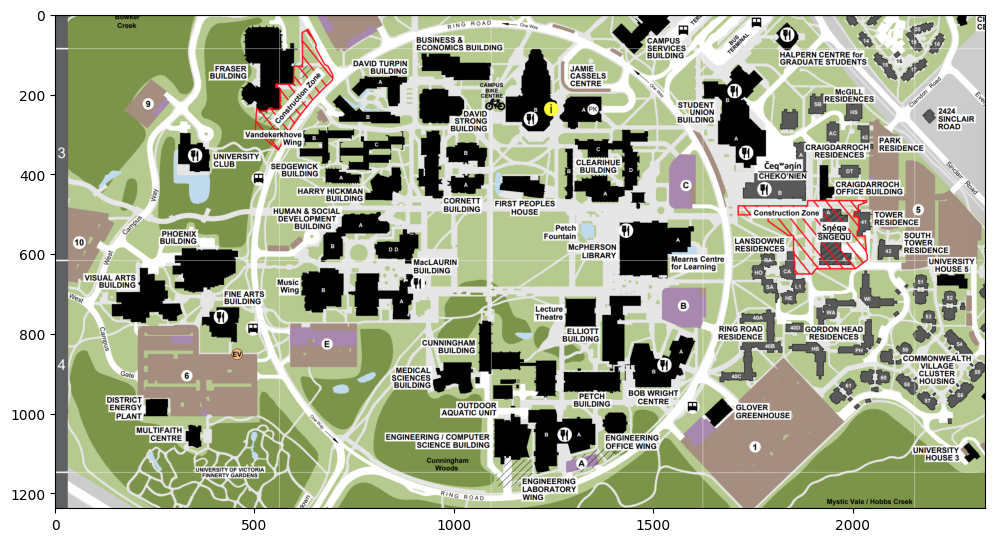

In [14]:
img = Image.open('../images/map.png')

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.axis('on')
plt.show()

Text(0.5, 1.0, 'Binary Image')

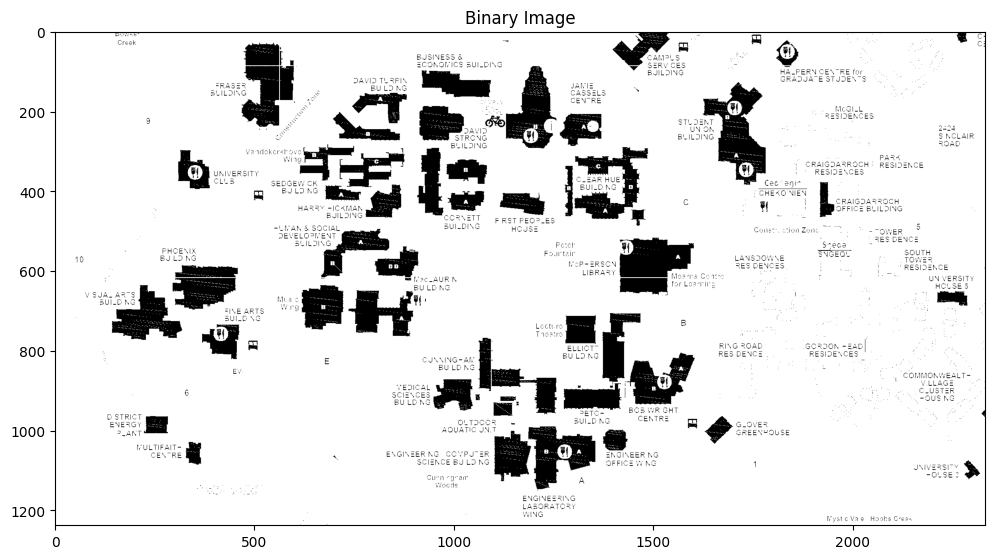

In [5]:
gray_img = np.array(img.convert('L'))

binary_img = gray_img < 0.04

plt.figure(figsize=(12,12))
plt.imshow(binary_img, cmap='binary')
plt.title('Binary Image')

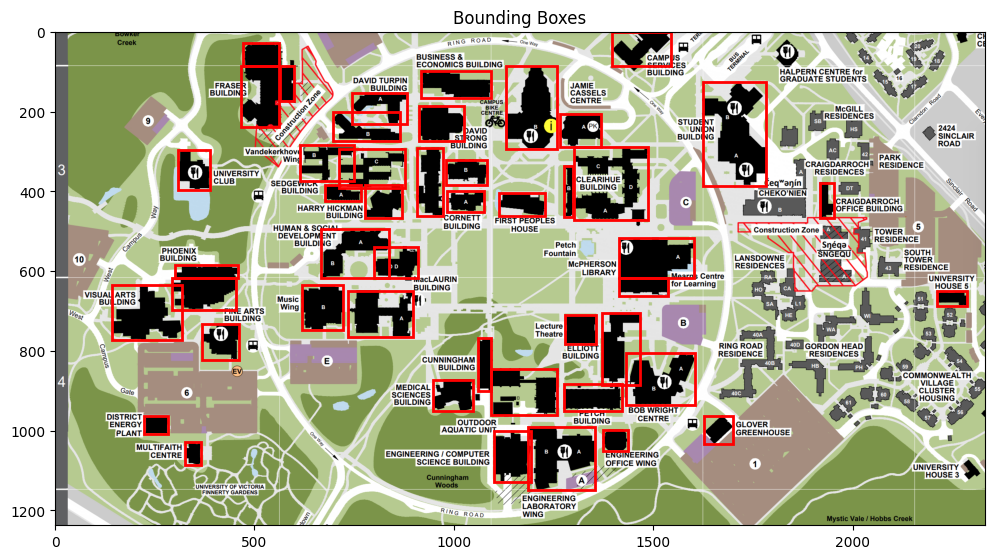

In [10]:
dilated_img = dilation(binary_img, square(2))

labeled_dilated_img = label(dilated_img)

dilated_regions = regionprops(labeled_dilated_img)

potential_text_regions = [region for region in dilated_regions if region.area > 1700]

bounding_boxes = [region.bbox for region in potential_text_regions]

plt.figure(figsize=(12, 12))
plt.imshow(img)

for bbox in bounding_boxes:
    minr, minc, maxr, maxc = bbox
    plt.gca().add_patch(plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2))

plt.axis('on')
plt.title("Bounding Boxes")
plt.show()

In [13]:
with open('../data/bbox.json', 'w') as file:
    json.dump(bounding_boxes, file)